In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2,validation_split=0.3)

In [3]:
x_train=train_data_gen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/flowers",target_size=(64,64),class_mode="categorical",batch_size=24,subset="training",shuffle=True)

Found 3024 images belonging to 5 classes.


In [4]:
x_test=train_data_gen.flow_from_directory(r"/content/drive/MyDrive/Assignment 3/flowers",target_size=(64,64),class_mode="categorical",batch_size=24,subset="validation")

Found 1293 images belonging to 5 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,3)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(5,activation="softmax"))
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [9]:
model.fit(x_train,epochs=10,validation_data=x_test)

Epoch 1/10
126/126 [==============================] - 1768s 14s/step - loss: 1.3083 - accuracy: 0.4375 - val_loss: 1.1553 - val_accuracy: 0.5290
Epoch 2/10
126/126 [==============================] - 38s 302ms/step - loss: 1.0786 - accuracy: 0.5592 - val_loss: 1.1205 - val_accuracy: 0.5615
Epoch 3/10
126/126 [==============================] - 38s 302ms/step - loss: 1.0075 - accuracy: 0.6019 - val_loss: 1.0443 - val_accuracy: 0.5878
Epoch 4/10
126/126 [==============================] - 38s 300ms/step - loss: 0.9430 - accuracy: 0.6349 - val_loss: 1.0290 - val_accuracy: 0.5754
Epoch 5/10
126/126 [==============================] - 38s 305ms/step - loss: 0.8815 - accuracy: 0.6571 - val_loss: 0.9974 - val_accuracy: 0.6226
Epoch 6/10
126/126 [==============================] - 38s 303ms/step - loss: 0.8674 - accuracy: 0.6577 - val_loss: 1.0175 - val_accuracy: 0.6063
Epoch 7/10
126/126 [==============================] - 38s 302ms/step - loss: 0.8338 - accuracy: 0.6763 - val_loss: 1.0279 - val_ac

In [10]:
model.save("flower.h5")

Testing

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [12]:
model=load_model("/content/drive/MyDrive/Assignment 3/flower.h5")

In [15]:
img=image.load_img("/content/drive/MyDrive/Assignment 3/flowers/daisy/100080576_f52e8ee070_n.jpg",target_size=(64,64))

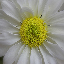

In [16]:
img

In [17]:
x=image.img_to_array(img)
x.ndim

3

In [18]:
x=np.expand_dims(x,axis=0)

In [19]:
pred=model.predict(x)

In [20]:
pred

array([[1., 0., 0., 0.]], dtype=float32)

In [21]:
labels=['daisy','dandelion','rose','sunflower','tulip']

In [22]:
labels[np.argmax(pred)]

'daisy'